# Workflow for processing  Multi-Timeline Lake Lefroy - 25JUN18 - Landsat8

In [1]:
import numpy as np
import sys
sys.path.append("..")

import time
start_time = time.time()

#
# Set up input and output directories
#
indir = '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Lake_Lefroy/25JUN18/'
output = '/g/data/u46/users/aw3463/GuyByrne/calval/PNGS/LLF-MultiTimeLine/'

#
# field_data is in the format: 'Field Site Name', 'Date', 'Site number', 'Satellite Name', 'Panel name',
# and 'Radiance'/'Reflectance'.
# NOTE: Satellite name should be one of: 'Landsat8', 'Sentinel2a', or 'Sentinel2b'.
#
field_data = ['LLF', '25JUN18', '', 'Landsat8', 'CSIRO_Panel', 'Radiance']

#
# bad_pans    contains the names of individual panels readings that appear to be bogus
# bad_grounds contains ground-reading file names that appear to be bogus
# Use empty lists if there are no bad spectra.
#
bad_grounds = ['LLF_20180625_00183.asd.rad', 'LLF_20180625_00184.asd.rad', 'LLF_20180625_00185.asd.rad', 
               'LLF_20180625_00183.asd.rad', 'LLF_20180625_00184.asd.rad', 'LLF_20180625_00185.asd.rad']
# ALL Bad_grounds files have NO GPS coordinates. The rest of the dataset has GPS ccords.
bad_pans = ['LLF_20180625_00210.asd.rad', 'LLF_20180625_00420.asd.rad']

ls8_bad_days = ['2013-03-26', '2013-05-26', '2013-06-11', '2013-06-27', '2013-07-13',
                '2013-09-15', '2013-11-02', '2013-12-04', '2014-01-21',
                '2014-02-22', '2014-03-10', '2014-03-26', '2014-04-11', '2014-04-27',
                '2014-05-29', '2014-06-14', '2014-06-30', '2014-07-16', '2014-09-02',
                '2014-10-20', '2014-12-23', '2015-02-09', '2015-02-25', '2015-04-14',
                '2015-05-16', '2015-06-17', '2015-07-19',
                '2015-08-20', '2015-09-05', '2015-11-08', '2015-11-24', '2016-01-27',
                '2016-04-16', '2016-07-05', '2016-07-21', '2016-08-06', '2016-08-22',
                '2016-09-07', '2016-10-09', '2016-10-25', '2016-11-10', '2016-12-12',
                '2016-12-28', '2017-01-29', '2017-05-21', '2017-06-22', '2017-07-08',
                '2017-08-25', '2017-09-26', '2017-11-13', '2018-01-16', '2018-02-01',
                '2018-02-17', '2018-03-21', '2018-04-22', '2018-05-08', '2018-07-27',
                '2018-09-29']
s2a_bad_days = ['2015-08-27', '2015-08-30', '2015-11-18', '2015-11-25', '2015-12-05',
                '2016-01-04', '2016-01-17', '2016-01-24', '2016-03-07', '2016-03-24',
                '2016-04-06', '2016-04-13', '2016-04-26', '2016-05-03', '2016-05-06',
                '2016-05-16', '2016-05-23', '2016-05-26', '2016-06-02',
                '2016-06-05', '2016-06-12', '2016-06-15', '2016-07-12', '2016-08-04',
                '2016-08-31', '2016-09-10', '2016-09-13', '2016-10-20', '2016-12-12',
                '2016-12-19', '2017-01-18', '2017-01-31', '2017-02-07', '2017-02-10',
                '2017-02-27', '2017-03-02', '2017-03-09', '2017-03-12', '2017-03-19',
                '2017-03-22', '2017-03-29', '2017-04-21', '2017-04-28', '2017-05-01',
                '2017-05-08', '2017-05-11', '2017-05-28', '2017-06-27', '2017-07-20',
                '2017-07-30', '2017-08-09', '2017-08-16', '2017-08-19', '2017-08-26',
                '2017-08-29', '2017-09-08', '2017-09-15', '2017-09-25', '2017-10-05',
                '2017-11-14', '2017-11-17', '2017-11-24', '2017-12-04', '2017-12-17',
                '2018-01-06', '2018-01-16', '2018-01-26',
                '2018-02-02', '2018-02-22', '2018-02-25', '2018-03-04', '2018-03-24',
                '2018-03-27', '2018-04-26', '2018-05-06', '2018-05-26', '2018-06-02',
                '2018-06-05', '2018-07-02', '2018-07-05', '2018-07-12']
s2b_bad_days = ['2017-07-02', '2017-07-05', '2017-07-22', '2017-08-21', '2017-08-24',
                '2017-09-10', '2017-09-23', '2017-09-30', '2017-11-09', '2017-11-19',
                '2017-12-09', '2017-12-19', '2018-01-18', '2018-01-21', '2018-01-28',
                '2018-01-31', '2018-02-07', '2018-02-17', '2018-02-20', '2018-03-12',
                '2018-03-22', '2018-04-01', '2018-04-21', '2018-04-28', '2018-05-08',
                '2018-05-11', '2018-05-31', '2018-06-20', '2018-07-07']
                
ls8_csvs = ['LLF_25JUN18__Landsat8.csv']

sent_csvs = ['LLF_25JUN18__Sentinel2a.csv']

rain_dat = '../Weather/IDCJAC0009_012117_1800_Data.csv'

#
# Define the first line and spectrum number for all/good panels and grounds
#
firstGoodLine = 1
firstGoodPanelSpec = 70
firstGoodGroundSpec = 80

#
# Calculated BRDF data
#
brdf_data = np.array([['', 'brdf0', 'brdf1', 'brdf2'],
                          ['band1', 0.0537611726166567, 0.016196332082497877, 0.007141318446564347],
                          ['band11', 0.3626388150849611, 0.062087221708198935, 0.05109038239242529],
                          ['band12', 0.28284062526502196, 0.026515330328819472, 0.04204382887087489],
                          ['band2', 0.0537611726166567, 0.016196332082497877, 0.007141318446564347],
                          ['band3', 0.0992414591007892, 0.03455252172736913, 0.0164107229349012],
                          ['band4', 0.16201653766999924, 0.030192011478126467, 0.02701572687665541],
                          ['band5', 0.16201653766999924, 0.030192011478126467, 0.02701572687665541],
                          ['band6', 0.16201653766999924, 0.030192011478126467, 0.02701572687665541],
                          ['band7', 0.2490140591778518, 0.11702102371624387, 0.026652130169785848],
                          ['band8', 0.2490140591778518, 0.11702102371624387, 0.026652130169785848],
                          ['band8a', 0.2490140591778518, 0.11702102371624387, 0.026652130169785848],
                         ])

#
# plot_scale defines the extent of the axes in the final two plots in the workflow.
# A scale from 0-1 means no reflectance to perfect reflectance. Typically, dark sites
# will range from 0-0.3, whereas bright sites will be between 0-1.
#
plot_scale = [0.0, 0.7, 0.0, 0.7]

#
# Define corners of field data, if GPS coordinates are NOT written into headers.
# Order is SE, SW, NE, NW. Units are decimal degrees.
# If there are no coordinates, then set RockWalk to either True or False.
# True  means that the field site was walked in a rock-like pattern (alternating directions),
# False means that the field site was walked in a roll-like pattern (same direction)
#
Corners = [0, 0, 0, 0, 0, 0, 0, 0]
RockWalk = True
StartCorner = 'SE'

In [2]:
import matplotlib.pyplot as plt
import matplotlib

#
# Astropy is used to determine the Solar angle
#
import astropy.coordinates as coord
from astropy.time import Time
import astropy.units as u

import datacube

from CalVal import *

#
# Use notebook format (allows inline zooming and moving of figures)
# Set default font size for all plots
#
%matplotlib notebook
matplotlib.rcParams.update({'font.size': 12})
matplotlib.rcParams['savefig.dpi'] = 300

In [3]:
#######################################
# LINES BELOW SHOULD REMAIN UNCHANGED #
#######################################
#
# panel_dir and in_panel refer to the file that is used in determining the k-factor,
# so this should remain unchanged.
#
if field_data[5] == 'Radiance':
    suffix = 'asd.rad.txt'
else: 
    suffix = 'asd.txt'

panel_dir =  '/g/data1a/u46/users/aw3463/GuyByrne/30APR18/Panels/'

if field_data[4] == 'GA_Panel':
    in_panel = 'ga_panel1_jan_2018.txt'
elif field_data[4] == 'CSIRO_Panel':
    in_panel = 'csiro_panel.txt'
elif field_data[4] == 'UA_Panel':
    in_panel = 'ua_panel.txt'
elif field_data[4] == 'UOW_Panel':
    in_panel = 'uow_panel.txt'
elif field_data[4] == 'UQ_Panel':
    in_panel = 'uq_panel.txt'
elif field_data[4] == 'CSIRO_VIC_Panel':
    in_panel = 'csiro_vic_panel.txt'
else:
    nopanel = '***PANEL NAME NOT KNOWN***'
    print(nopanel)

#
# Setup for Landsat and Sentinel bandpass filters
#
sat_resp = dict({'Landsat5': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat5_vsir.flt', 
            'Landsat7': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat7_vsir.flt', 
            'Landsat8': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/landsat8_vsir.flt',
            'Sentinel2a': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2a.flt',
            'Sentinel2b': '/g/data1a/u46/users/aw3463/GuyByrne/misc_others/Sent2b.flt'})

f_name = sat_resp[field_data[3]]

#
# Colours used for plotting multi-coloured Lines
#
colpac=['#770000', '#FF0000', '#FF7700', '#FFFF00', '#77FF00', '#00FF00', 
        '#00FF77', '#00FFFF', '#0077FF', '#0000FF', '#000077', '#FF00FF', '#777777', '#770077', '#777700']

#
# Start Figure numbering at 1
#
fignum = 1



### Define 'alldata' as the dataframe that contains all the raw spectra.
Show the first wavelength of every spectrum, so that the data integrity can be checked.

In [4]:
alldata = LoadData.load_from_dir(indir, suffix, firstGoodLine, Corners)

alldata[alldata['Wavelength']==350]

Wavelength  radiance                    filename          date_saved  \
0          350  0.074816  LLF_20180625_00070.asd.rad 2018-06-25 01:53:45   
0          350  0.075250  LLF_20180625_00071.asd.rad 2018-06-25 01:53:48   
0          350  0.075219  LLF_20180625_00072.asd.rad 2018-06-25 01:53:50   
0          350  0.075276  LLF_20180625_00073.asd.rad 2018-06-25 01:53:53   
0          350  0.075336  LLF_20180625_00074.asd.rad 2018-06-25 01:53:56   
0          350  0.075317  LLF_20180625_00075.asd.rad 2018-06-25 01:53:59   
0          350  0.075407  LLF_20180625_00076.asd.rad 2018-06-25 01:54:02   
0          350  0.075514  LLF_20180625_00077.asd.rad 2018-06-25 01:54:04   
0          350  0.075409  LLF_20180625_00078.asd.rad 2018-06-25 01:54:07   
0          350  0.075497  LLF_20180625_00079.asd.rad 2018-06-25 01:54:10   
0          350  0.022036  LLF_20180625_00080.asd.rad 2018-06-25 01:55:32   
0          350  0.021522  LLF_20180625_00081.asd.rad 2018-06-25 01:55:35   
0          350  0.021820  LLF_20180625_00082.asd.rad 2018-06-25 01:55:38   
0          350  0.022325  LLF_20180625_00083.asd.rad 2018-06-25 01:55:40   
0          350  0.020141  LLF_20180625_00084.asd.rad 2018-06-25 01:55:43   
0          350  0.022456  LLF_20180625_00085.asd.rad 2018-06-25 01:55:46   
0          350  0.022686  LLF_20180625_00086.asd.rad 2018-06-25 01:55:49   
0          350  0.022367  LLF_20180625_00087.asd.rad 2018-06-25 01:55:51   
0          350  0.021857  LLF_20180625_00088.asd.rad 2018-06-25 01:55:54   
0          350  0.021956  LLF_20180625_00089.asd.rad 2018-06-25 01:55:57   
0          350  0.022189  LLF_20180625_00090.asd.rad 2018-06-25 01:56:00   
0          350  0.022660  LLF_20180625_00091.asd.rad 2018-06-25 01:56:03   
0          350  0.022803  LLF_20180625_00092.asd.rad 2018-06-25 01:56:05   
0          350  0.022689  LLF_20180625_00093.asd.rad 2018-06-25 01:56:08   
0          350  0.023182  LLF_20180625_00094.asd.rad 2018-06-25 01:56:11   
0          350  0.022486  LLF_20180625_00095.asd.rad 2018-06-25 01:56:13   
0          350  0.022331  LLF_20180625_00096.asd.rad 2018-06-25 01:56:16   
0          350  0.023023  LLF_20180625_00097.asd.rad 2018-06-25 01:56:19   
0          350  0.023589  LLF_20180625_00098.asd.rad 2018-06-25 01:56:22   
0          350  0.022894  LLF_20180625_00099.asd.rad 2018-06-25 01:56:24   
..         ...       ...                         ...                 ...   
0          350  0.029400  LLF_20180625_00461.asd.rad 2018-06-25 02:28:59   
0          350  0.028633  LLF_20180625_00462.asd.rad 2018-06-25 02:29:02   
0          350  0.028893  LLF_20180625_00463.asd.rad 2018-06-25 02:29:05   
0          350  0.029568  LLF_20180625_00464.asd.rad 2018-06-25 02:29:07   
0          350  0.029826  LLF_20180625_00465.asd.rad 2018-06-25 02:29:10   
0          350  0.029055  LLF_20180625_00466.asd.rad 2018-06-25 02:29:13   
0          350  0.029511  LLF_20180625_00467.asd.rad 2018-06-25 02:29:15   
0          350  0.029338  LLF_20180625_00468.asd.rad 2018-06-25 02:29:18   
0          350  0.029491  LLF_20180625_00469.asd.rad 2018-06-25 02:29:21   
0          350  0.029646  LLF_20180625_00470.asd.rad 2018-06-25 02:29:24   
0          350  0.030255  LLF_20180625_00471.asd.rad 2018-06-25 02:29:26   
0          350  0.030876  LLF_20180625_00472.asd.rad 2018-06-25 02:29:29   
0          350  0.029956  LLF_20180625_00473.asd.rad 2018-06-25 02:29:32   
0          350  0.029438  LLF_20180625_00474.asd.rad 2018-06-25 02:29:35   
0          350  0.029003  LLF_20180625_00475.asd.rad 2018-06-25 02:29:37   
0          350  0.028790  LLF_20180625_00476.asd.rad 2018-06-25 02:29:40   
0          350  0.029818  LLF_20180625_00477.asd.rad 2018-06-25 02:29:43   
0          350  0.029899  LLF_20180625_00478.asd.rad 2018-06-25 02:29:46   
0          350  0.029744  LLF_20180625_00479.asd.rad 2018-06-25 02:29:49   
0          350  0.030542  LLF_20180625_00480.asd.rad 2018-06-25 02:29:51   
0          350  0.089241  LLF_20180625_00481.asd.rad

### Print out time stamp and coordinate extent for BRDF correction

The time stamp and Lat/Long extents are required to calculate the BRDF correction, used below.

In order to calculate the BRF correction, the following method is used:

<OL>
    <LI>Run the print statements in the cell below.</LI>
    <LI>Copy and paste the output into a VDI terminal window</LI>
    <LI>Copy and paste the resultant VDI output into the BRDF calculation cell, writing over the similar text.</LI>
</OL>

NOTE: This works assuming that the BRDF code is in the current directory.


In [5]:
PrintBRDF.print_brdf(alldata, field_data)

#################################################################################
# Copy and paste the following into a terminal window on VDI for Landsat 8 data #
#################################################################################

source module.sh
sed -i "34s/.*/        setattr(self, 'acquisition_datetime', dateutil.parser.parse('2018-06-25 01:53:45'))/" retrieve_brdf.py
sed -i "37s/.*/        bbox = geopandas.GeoDataFrame({'geometry': [box(0.0, -31.34175, 121.64857816666667, 0.0)]})/" retrieve_brdf.py
python retrieve_brdf.py > temp.txt ; awk -f format_Sent.awk temp.txt



### Specify which spectra are panels/ground/good/bad

 Determine panel file names by assuming that all panels have a data value of at least 0.06
 in the first wavelength (350nm). Call this dataframe 'panel_names'.

 good_panels = all panel data with bad panels removed<BR>
 bad_panels  = all bad panel data<BR>
 all_panels = both good and bad panel data<BR>
 good_grounds = good ground readings<BR>
 all_grounds = all ground data.<P>
 Any bad ground data (bad_grounds) is defined in the 2nd cell.


In [6]:
panel_names, all_panels, good_panels, bad_panels, good_grounds, all_grounds = ExtractPanelsGrounds.extract_panels_grounds(alldata, bad_pans, bad_grounds, field_data)

### Create dataframes for all/good/bad panel spectra.

For the bad panel spectra dataframe, first check to see if bad panels have been defined.<BR>
If not, then don't create anything.

In [7]:
all_panel_spec = MakeSpecDF.make_spec_df(all_panels)
good_panel_spec = MakeSpecDF.make_spec_df(good_panels)
try:
    bad_panel_spec = MakeSpecDF.make_spec_df(bad_panels)
except UnboundLocalError:
    pass

# Figure 

### Plot panel radiances for all/good/bad panels

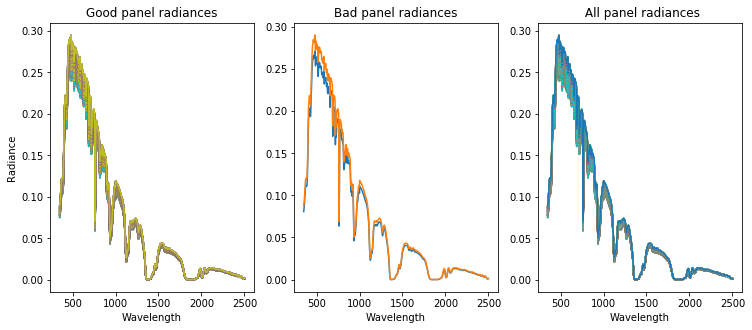

In [8]:
try:
    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)
except NameError:
    bad_panel_spec = [0,0]
    FIG_PanelRadiances.FIG_panel_radiances(good_panel_spec, bad_panel_spec, all_panel_spec, output, field_data, fignum)

fignum += 1

# Figure 

### Diagnosis plots of bad panel spectra

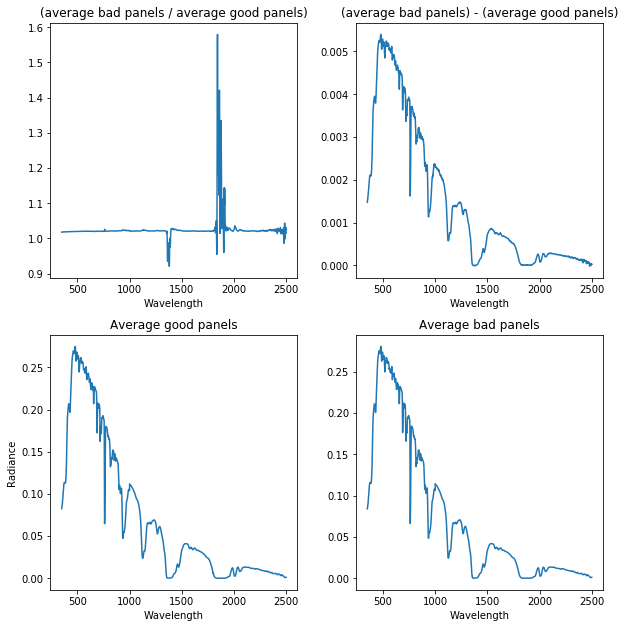

In [9]:
good_panel_mean = good_panel_spec.mean(axis=1)

try:
    FIG_BadPanelAnalysis.FIG_bad_panel_analysis(good_panel_mean, good_panel_spec, bad_panel_spec, output, field_data, fignum)
except AttributeError:
    pass
fignum +=1

### Create spectral dataframes for all ground spectra and good ground spectra

In [10]:
all_grounds_spec = MakeSpecDF.make_spec_df(all_grounds)
good_grounds_spec = MakeSpecDF.make_spec_df(good_grounds)

# Figure 

### Plot ground spectra (all and good), normalised to the median good spectrum

These plots are used to identify any ground spectra that are bogus.

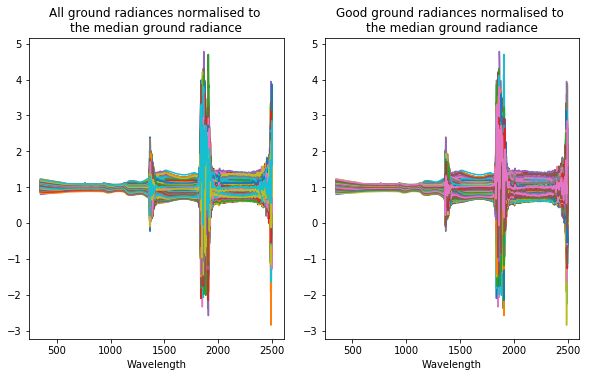

In [11]:
FIG_GroundSpectra.FIG_ground_spectra(good_grounds_spec, all_grounds_spec, output, field_data, fignum)
fignum +=1

### Create time-relative dataframes

gpt = good panels<BR>
gpta = all panels<BR>
adt = good grounds<BR>
adta = all grounds

In [12]:
gpt, gpta, adt, adta = CreateTimeRelativeDF.create_time_relative_dfs(good_panels, all_panels, good_grounds, all_grounds)

# Figure 

### Plot timelines for ALL panel and ground data, with one line in one panel

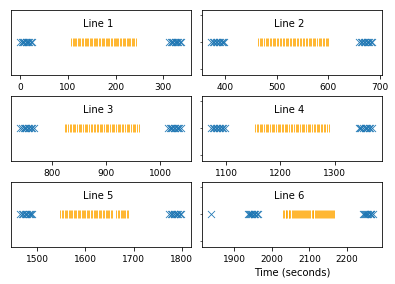

In [13]:
FIG_AllTimelines.FIG_all_timelines(gpta, adta, output, field_data, fignum)
fignum += 1

# Figure 

### Plot timelines for GOOD panel and ground data, with one line in one panel

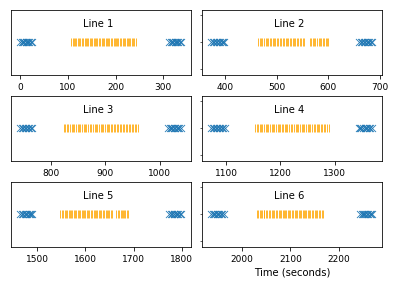

In [14]:
from CalVal.FIG_AllTimelines import panel_plot_layout, multi_timeline_plot

FIG_GoodTimelines.FIG_good_timelines(gpta, gpt, adt, panel_plot_layout, multi_timeline_plot, output, field_data, fignum)
fignum += 1

# Figure 

### Create timeline plot of averaged, normalised all/good panels

These plots are used to identify any panels that show unusually bright or dark readings,<BR>
    which can be weeded out as bad panels.
    
The general shape of the curve should follow "insolation" - the changing of incident light
due to the Sun rising/falling in the sky.

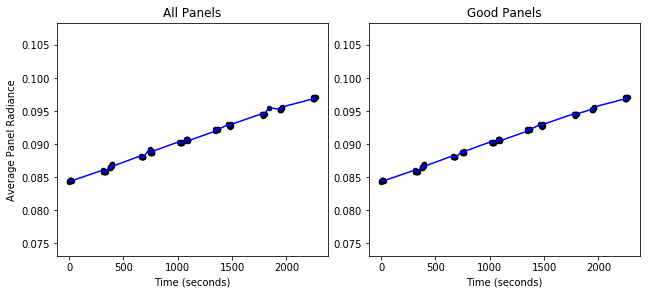

In [15]:
gpt, gpta = FIG_NormalisedPanelsTimeline.normalise_spectra(good_panel_mean, good_panel_spec, all_panel_spec, gpt, gpta)
    
FIG_NormalisedPanelsTimeline.FIG_normalised_panels_timeline(gpt, gpta, output, field_data, fignum)
fignum += 1

### Define the K-factor

This reads a standard file with a response curve for the detector, given an ideally white surface.<BR>
Then "k_f" is defined for the K-factor.

In [16]:
k_f = KFactor.k_factor(panel_dir, in_panel)

### Rename the first spectrum in ALL/GOOD panels to the correct name

Rather than just "radiance", it will be named something like radiance1-0<BR>
for the zeroth spectrum in the first line, for example.    

In [17]:
SpecRename.spec_rename(good_panel_spec, good_grounds_spec, firstGoodLine, firstGoodPanelSpec, firstGoodGroundSpec)

### Create dataframe with Reflectances

In [18]:
all_refls = CreateReflectances.create_reflectances(good_panels, good_panel_spec, good_grounds_spec, k_f)

### Test for reflectances
Test field_data to see if the data were saved as reflectances. If so, bypass all the panelling workflow.

In [19]:
if field_data[5] == 'Reflectance':
    all_refls = good_grounds_spec

# Figure 

### Plot all ground reflectances in black, plus the Line-averaged reflectances in colour

The Line-averaged reflectances are shown in order to identify any outlying lines that<BR>

might have been caused by bad panel spectra (for example).

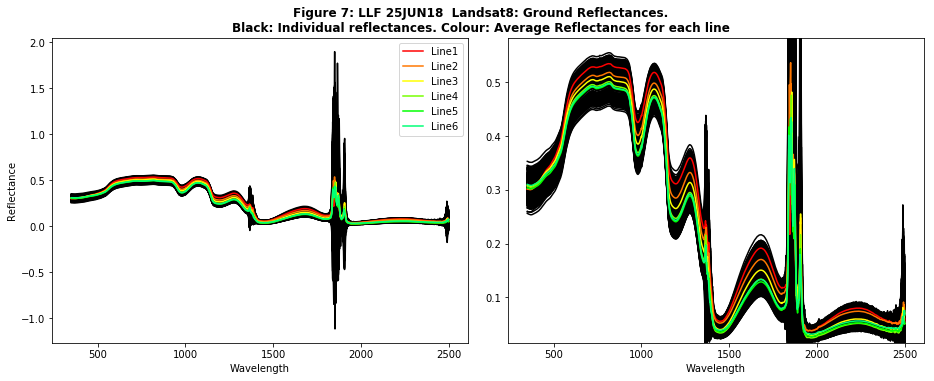

In [20]:
FIG_Reflectances.FIG_reflectances(good_panels, all_refls, colpac, output, field_data, fignum)
fignum += 1

### Apply weighted band responses to all reflectances

In [21]:
f_name = sat_resp['Landsat8']
result_ls8_df, band_ls8 = ApplyWeights.apply_weights(f_name, all_refls)
f_name = sat_resp['Sentinel2a']
result_s2a_df, band_s2a = ApplyWeights.apply_weights(f_name, all_refls)
f_name = sat_resp['Sentinel2b']
result_s2b_df, band_s2b = ApplyWeights.apply_weights(f_name, all_refls)

### Reformat band reflectances and apply to dataframe "ground_bands"

In [22]:
ground_bands_ls8 = ReformatDF.reformat_df(good_grounds, result_ls8_df)
ground_bands_s2a = ReformatDF.reformat_df(good_grounds, result_s2a_df)
ground_bands_s2b = ReformatDF.reformat_df(good_grounds, result_s2b_df)

# Figure 

### Plot band reflectances

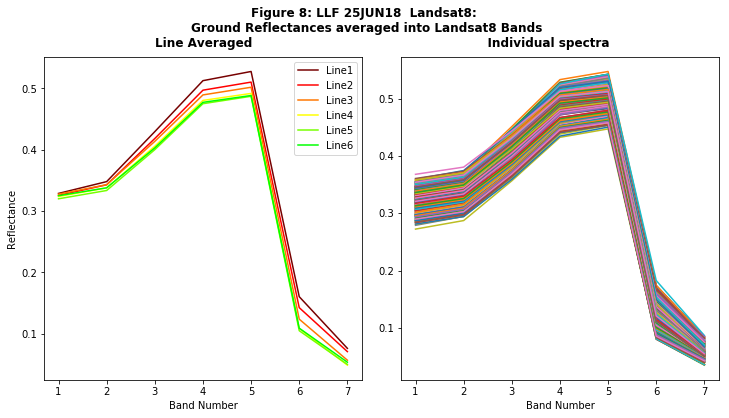

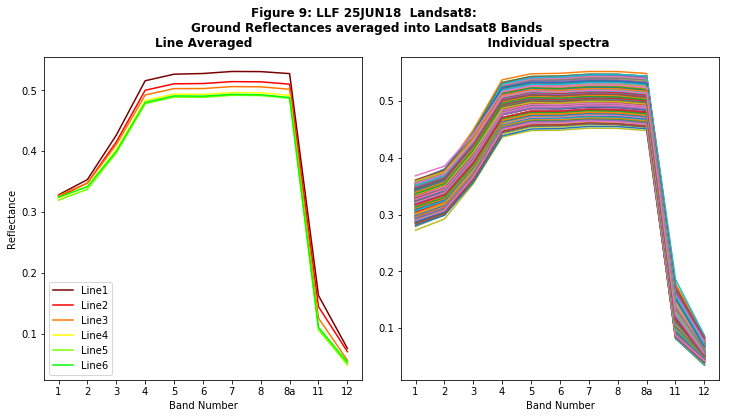

In [23]:
FIG_BandReflectances.FIG_band_reflectances(ground_bands_ls8, result_ls8_df, band_ls8, colpac, output, field_data, fignum)
fignum += 1
FIG_BandReflectances.FIG_band_reflectances(ground_bands_s2a, result_s2a_df, band_s2a, colpac, output, field_data, fignum)
fignum += 1

# Figure

### Histogram of all good spectra, plotted band-by-band

This can be used to identify outlying ground spectra that can be added to bad_grounds in the second cell.

/g/data/v10/public/modules/dea-env/20181015/lib/python3.6/site-packages/ipykernel/__main__.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


<Figure size 432x288 with 0 Axes>

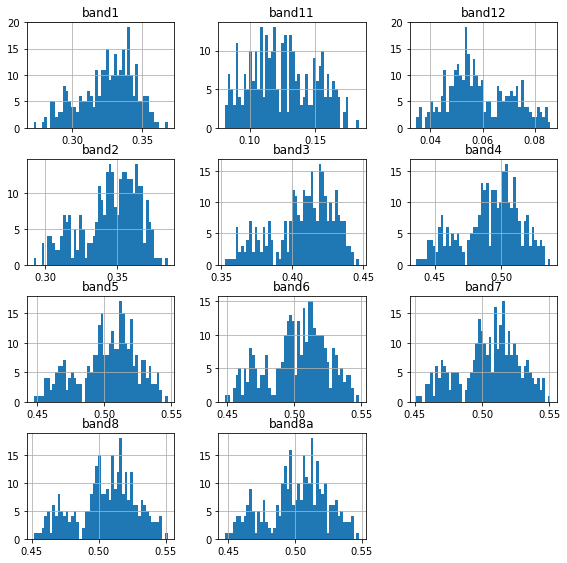

In [24]:
FIG_SpecHistogram.FIG_spec_histogram(ground_bands_s2b, output, field_data, fignum)
fignum += 1

### Outlying ground spectra

Display the spectra with maximum and minimum values. These can be compared to the histograms above<BR>
    to identify any outlying spectra that need to be identified as bad ground spectra.

In [25]:
maxfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
maxbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].max())]
minfile = ground_bands_s2b['filename'][(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]
minbands = ground_bands_s2b.filter(like='band')[(ground_bands_s2b['band1'] == ground_bands_s2b['band1'].min())]

print("Maximum value found in:", maxfile.iloc[0], '\n', maxbands.iloc[0], '\nMinimum value found in:', minfile.iloc[0], '\n', minbands.iloc[0])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].max())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].max())])
#print(ground_bands['filename'][(ground_bands['band1'] == ground_bands['band1'].min())], '\n',ground_bands.filter(like='band')[(ground_bands['band1'] == ground_bands['band1'].min())])


Maximum value found in: LLF_20180625_00399.asd.rad 
 band1     0.367971
band2     0.384788
band3     0.440012
band4     0.516008
band5     0.525432
band6     0.524668
band7     0.527059
band8     0.527402
band8a    0.523252
band11    0.138319
band12    0.060164
Name: 236, dtype: float64 
Minimum value found in: LLF_20180625_00221.asd.rad 
 band1     0.272300
band2     0.291984
band3     0.352758
band4     0.436299
band5     0.447531
band6     0.448246
band7     0.451295
band8     0.451395
band8a    0.447515
band11    0.084280
band12    0.038749
Name: 98, dtype: float64


### Determine Solar angle

Based on the spectrum Latitude, Longitude and time stamp, calculate the angle of<BR>
the Sun, with respect to the zenith. Append this number to the "ground_bands" dataframe.

In [26]:
def solar_angle(row):

    loc = coord.EarthLocation(lon=row['Longitude'] * u.deg,
                              lat=row['Latitude'] * u.deg)
    #timy0 = timei.to_pydatetime()
    timy = Time(row['date_saved'], format='datetime')
    
    altaz = coord.AltAz(location=loc, obstime=timy)
    sun = coord.get_sun(timy)

    return sun.transform_to(altaz).zen.degree

ground_bands_ls8['Solar_angle'] = ground_bands_ls8.apply(solar_angle, axis=1)
ground_bands_s2a['Solar_angle'] = ground_bands_s2a.apply(solar_angle, axis=1)
ground_bands_s2b['Solar_angle'] = ground_bands_s2b.apply(solar_angle, axis=1)

### BRDF Calculation

The following script is adapted from FORTRAN code that will calculate the adjusted ASD measurement to 45$^\circ$. This is derived from "MODIS BRDF / Albedo Product: Algorithm Theoretical basis Docuement Version 5.0" by Strahler et al. (1999).

What follows is a key to the variables used in this code, compared to the variables and equations in the document:

hb and br = h/b and b/r . . . . . . . . . . . . . . . crown shape parameters, respectively.<BR>
RL_brdf = R($\theta, \vartheta, \phi, \Lambda$). . . . . . . . . . . . . . (37)<BR>
solar = $\theta$ . . . . . . . . . . . . . . . . . . . . . . . . . . solar zenith angle<BR>
view = $\xi$ . . . . . . . . . . . . . . . . . . . . . . . . . . .view zenith angle<BR>
ra = $\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . view-sun relative azimuth angle<BR>
cosxi = cos $\xi^\prime$ . . . . . . . . . . . . . . . . . . . . . . (43)<BR>
rs_thick = K$_{vol}$ = RossThick kernel . . . . . . (38)<BR>
d_li2 = D$^2$ . . . . . . . . . . . . . . . . . . . . . . . . . (42)<BR>
x_li = tan$\theta^\prime$ tan$\vartheta^\prime$ sin$\phi$ . . . . . . . . . . . . . . .(41) (part of)<BR>
cosl = cos $t$ . . . . . . . . . . . . . . . . . . . . . . . . (41)<BR>
l_li = $t$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . .constrained such that $-1 \leq t \leq 1$<BR>
o_li = O($\theta, \vartheta, \phi$) . . . . . . . . . . . . . . . . . . . .(40)<BR>
li_sparse = K$_{geo}$ . . . . . . . . . . . . . . . . . . . . (39)<BR><BR><BR>

Equations used for the Ross-Li BRDF model:

R($\theta, \vartheta, \phi, \Lambda$) = $f_{iso}(\Lambda) + f_{vol}(\Lambda)\,K_{vol}(\theta, \vartheta, \phi) + f_{geo}(\Lambda)\,K_{geo}(\theta, \vartheta, \phi)$ . . . . . . . . (37)

$K_{vol} = k_{RT} = \frac{(\pi/2 - \xi)\rm{cos}\,\xi + \rm{sin}\,\xi}{\rm{cos}\,\theta + \rm{cos}\,\vartheta} - \frac{\pi}{4}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (38)
    
$K_{geo} = k_{LSR} = O(\theta, \vartheta, \phi) - {\rm sec}\,\theta^\prime - {\rm sec}\,\vartheta^\prime + \frac{1}{2} (1 + \rm{cos}\,\xi^\prime)\, \rm{sec}\,\theta^\prime \rm{sec}\,\vartheta^\prime$ . . . (39)

$O = \frac{1}{\pi}(t - \rm{sin}\,t\,\,\rm{cos}\,t)(\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (40)

$\rm{cos}\,t = \frac{h}{b}\frac{\sqrt{D^2 + (\rm{tan}\,\theta^\prime\,\,\rm{tan}\,\vartheta^\prime\,\,\rm{sin}\,\phi)^2}}{\rm{sec}\,\theta^\prime + \rm{sec}\,\vartheta^\prime}$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . (41)

$D = \sqrt{\rm{tan}^2\,\theta^\prime + \rm{tan}^2\,\vartheta^\prime - 2\,\rm{tan}\,\theta^\prime\,\rm{tan}\,\vartheta^\prime\,\rm{cos}\,\phi}$ . . . . . . . . . . . . . . . . . . . . . . . . . . (42)

$\rm{cos}\,\xi^\prime = \rm{cos}\,\theta^\prime\,\rm{cos}\,\vartheta^\prime + \rm{sin}\,\theta^\prime\,\rm{sin}\,\vartheta^\prime\,\rm{cos}\,\phi$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(43)

$\theta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\theta)\,\vartheta^\prime = \rm{tan}^{-1}(\frac{b}{r}\rm{tan}\,\vartheta)$ . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .(44)

In [27]:
ground_brdf_ls8, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_ls8, ['','','','Landsat8'])
ground_brdf_s2a, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_s2a, ['','','','Sentinel2a'])
ground_brdf_s2b, hb, br = BRDF.ReadAndCalc(brdf_data, ground_bands_s2b, ['','','','Sentinel2b'])

### Choose bands for Landsat 8 and Sentinel satellite data

In [28]:
from CalVal.ApplyWeights import get_spectrum_curve

band_nn = get_spectrum_curve(f_name)
senti_bands = [1,2,3,4,5,6,7,8,'8a',11,12]
ls8_bands = [1,2,3,4,5,6,7]

if field_data[3] == 'Landsat8':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in ls8_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in ls8_bands]

elif field_data[3] == 'Sentinel2a' or field_data[3] == 'Sentinel2b':
    band_min = [band_nn['band'+str(i)][:, 0].min() for i in senti_bands]
    band_max = [band_nn['band'+str(i)][:, 0].max() for i in senti_bands]

else:
    print('Satellite name should be one of Landsat8 or Sentinel. I got', field_data[3])

# Figure 

### Plot satellite band extents against median ground spectrum

This plot will show where the satellite bands fall, with respect to the spectrum<BR>
and in particular, with respect to the atmospheric absorbtion features.

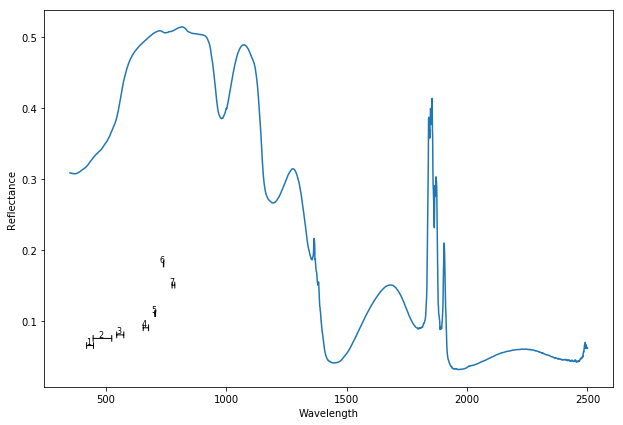

In [29]:
FIG_BandExtents.FIG_band_extents(all_refls, band_min, band_max, output, field_data, fignum)
fignum += 1

### Fudge GPS locations if none exist

In [30]:
ground_brdf_ls8 = FudgeGPS.fudge_gps(ground_brdf_ls8, Corners, RockWalk, StartCorner)
ground_brdf_s2a = FudgeGPS.fudge_gps(ground_brdf_s2a, Corners, RockWalk, StartCorner)
ground_brdf_s2b = FudgeGPS.fudge_gps(ground_brdf_s2b, Corners, RockWalk, StartCorner)

Assuming good GPS Coordinates, continuing...
Assuming good GPS Coordinates, continuing...
Assuming good GPS Coordinates, continuing...


### Query Satellite data

Retrieve xarrays for satellite data, based on which satellite, query area and time.<BR>
sat_array will contain all band data<BR>
sat_bigarray will be a larger version of sat_array, which can be used for context plotting.

In [31]:
ldc, sdc, lquery, squery, lquery2, squery2 = LongQuery.make_long_query(ground_brdf_ls8)

ls8_array, s2a_array, s2b_array, ls8_bigarray, s2a_bigarray, s2b_bigarray = CreateLongArrays.create_long_arrays_nomask(ldc, sdc, lquery, squery, lquery2, squery2)

# Figure 

### Plot relative locations of field and satellite data

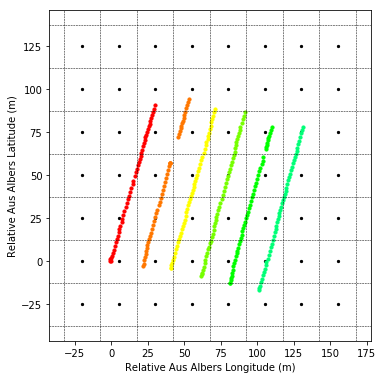

In [32]:
xloc = FIG_SatFieldLocations.FIG_sat_field_locations(ground_brdf_ls8, ls8_array, colpac, output, field_data, fignum)
fignum +=1

### Create Field full band xarray

The field xarray is based on the pixel locations of the satellite data, where each pixel<BR>
    contains an average of all field data measurements that fall within the pixel.

In [33]:
field_array_ls8, field_array_s2a = CreateManyFieldFromSat.create_many_field_from_sat(ls8_array, s2a_array, ground_brdf_ls8, ground_brdf_s2a, xloc)

# Figure 

### Plot large-area context RGB array for Satellite data

Landsat 8


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

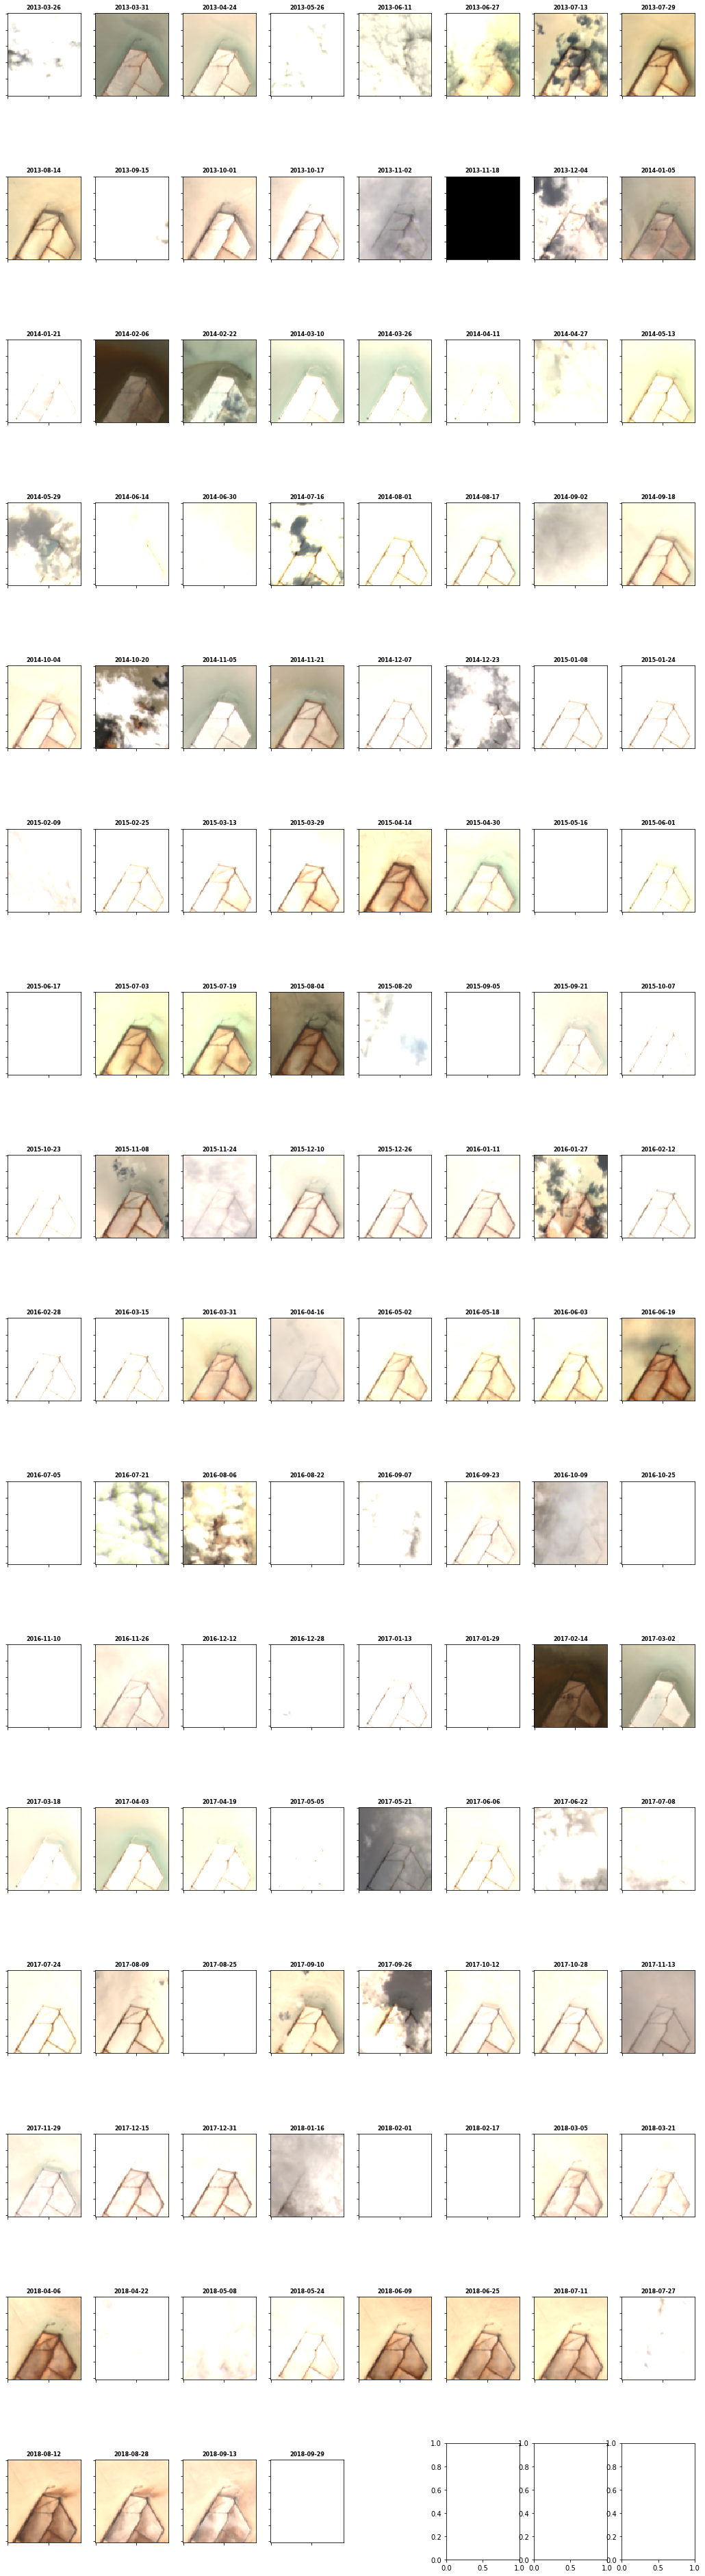

In [34]:
FIG_ManyLS8RGB.FIG_many_LS8RGB(ls8_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2a


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

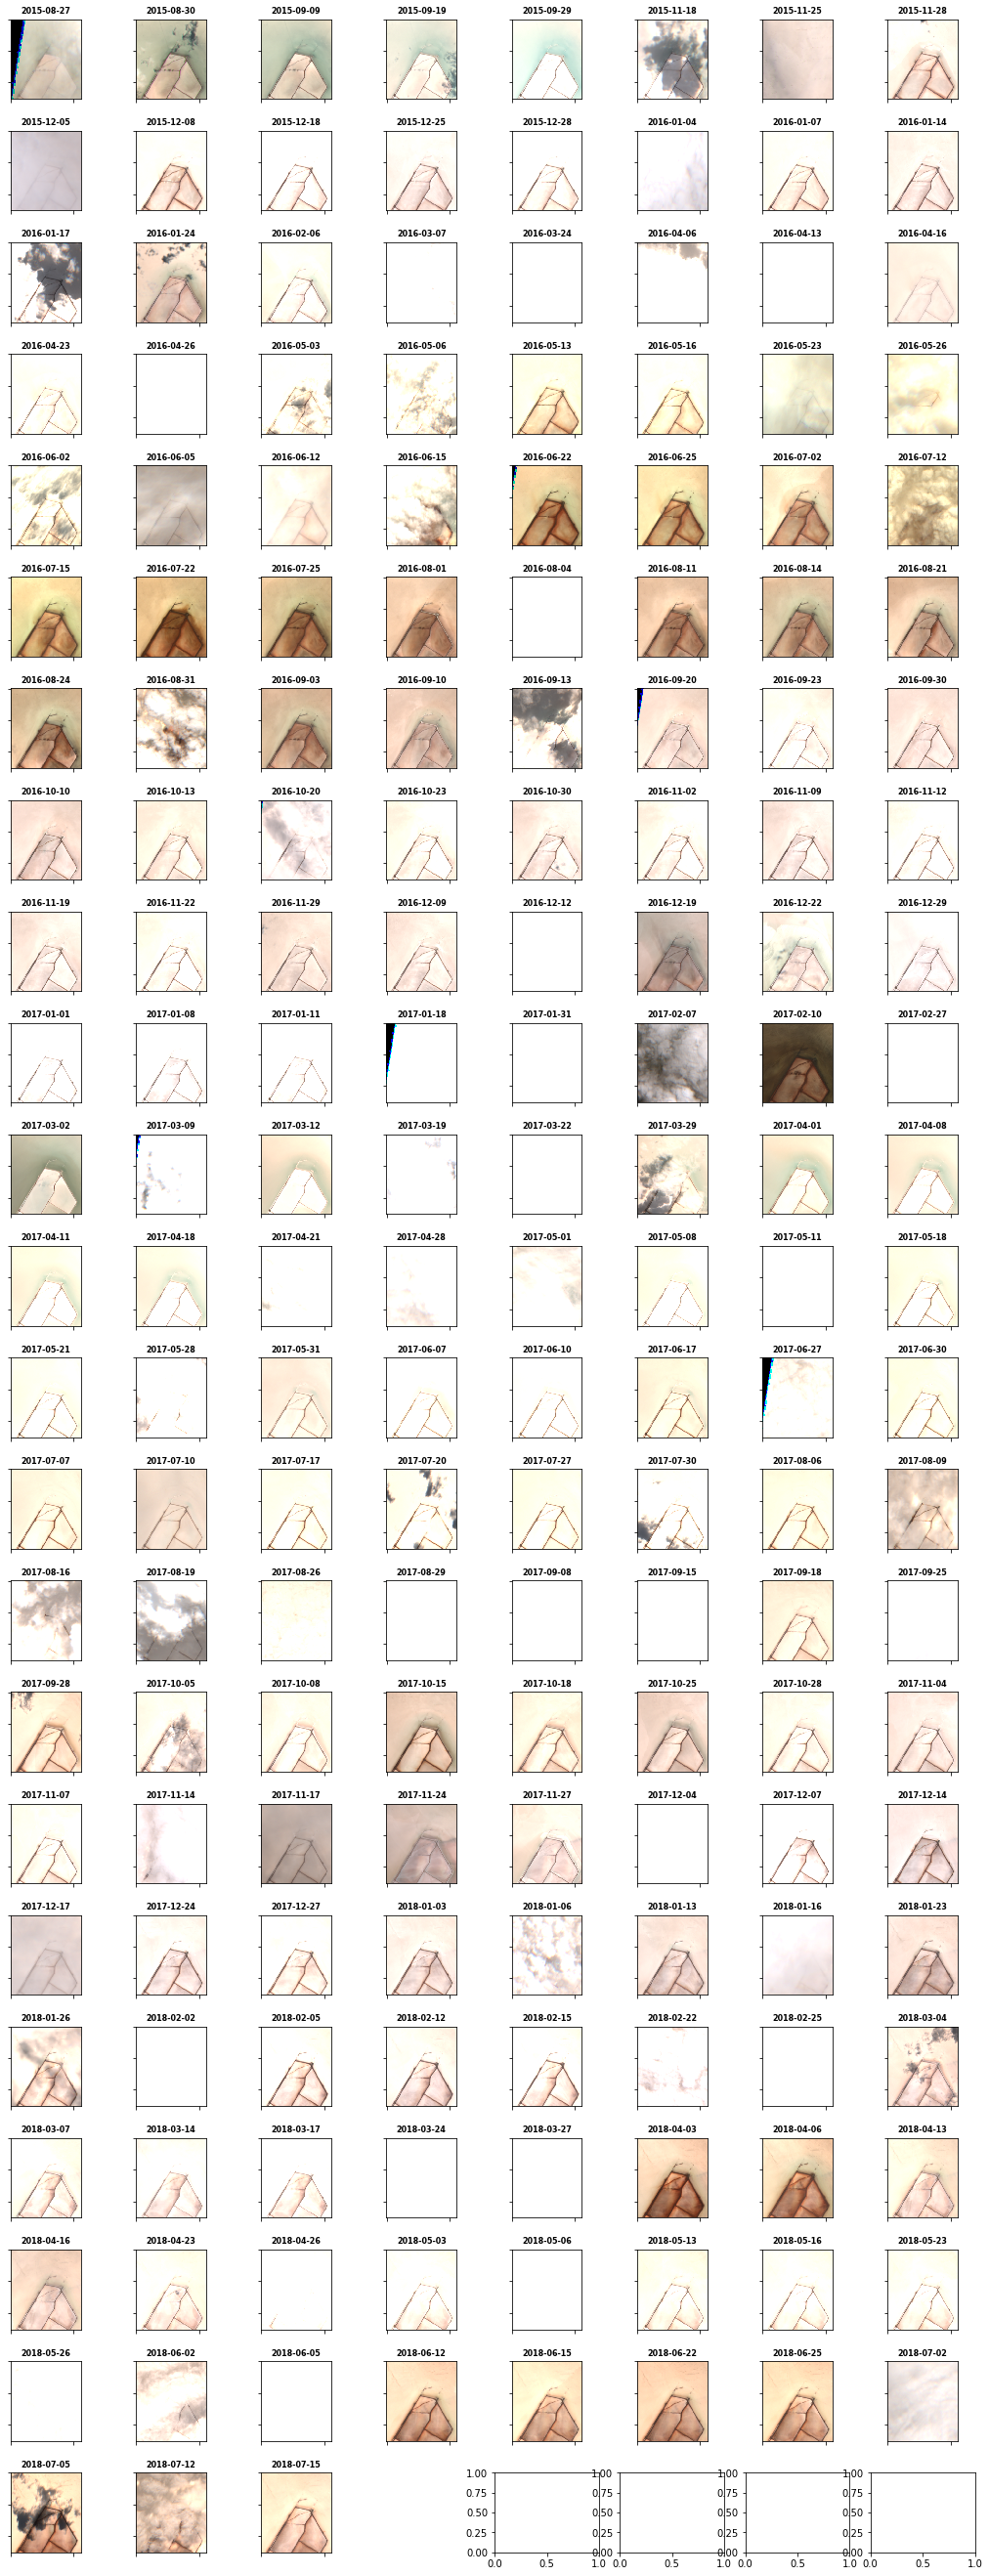

In [35]:
FIG_ManyS2ARGB.FIG_many_S2ARGB(s2a_bigarray, output, field_data, fignum)
fignum += 1

Sentinel 2b


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

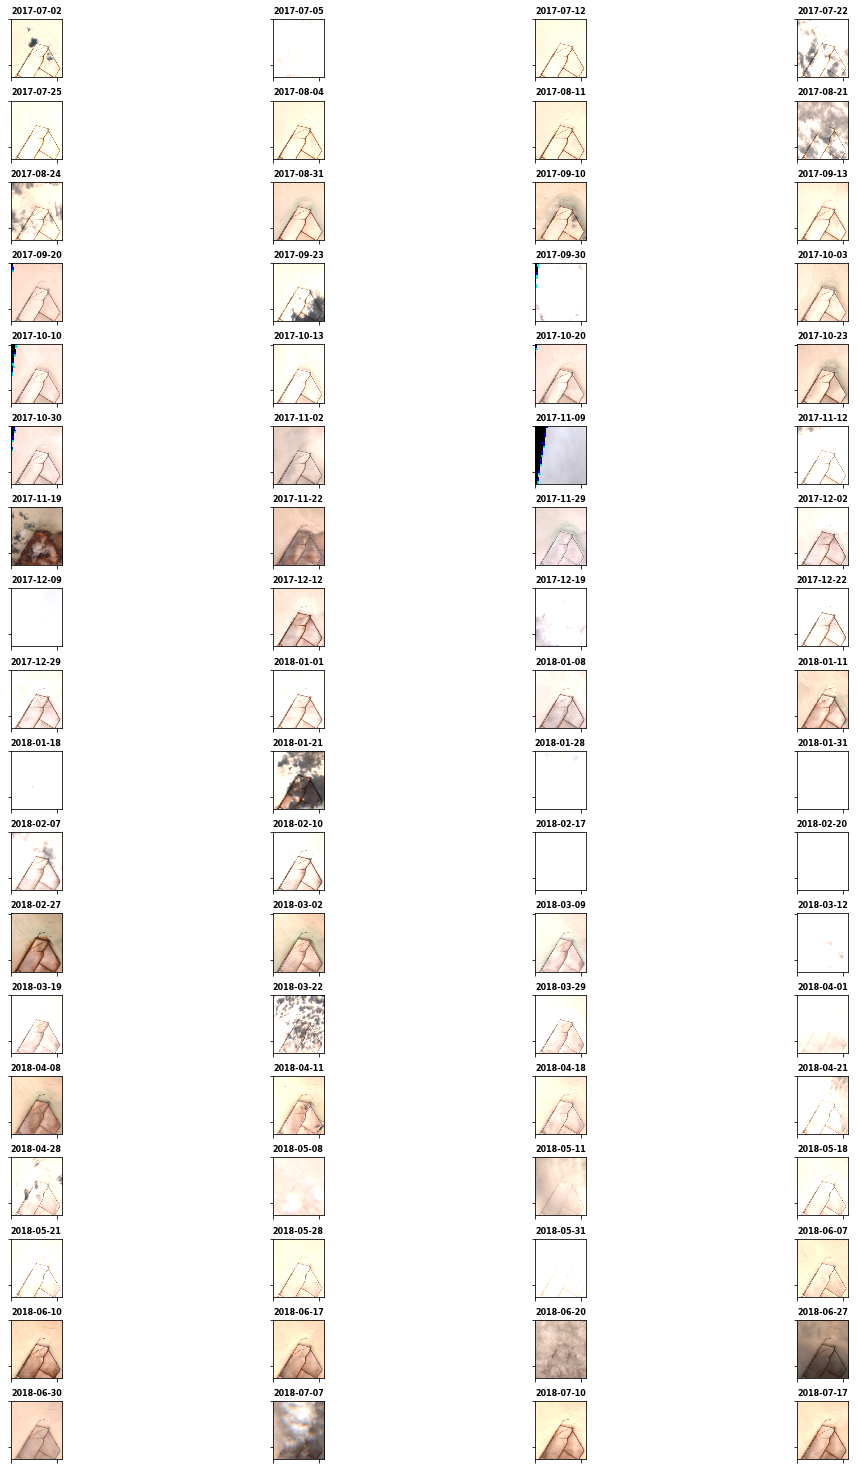

In [36]:
FIG_ManyS2BRGB.FIG_many_S2BRGB(s2b_bigarray, output, field_data, fignum)
fignum += 1

# Figure 

### Plot RGB array for Field data

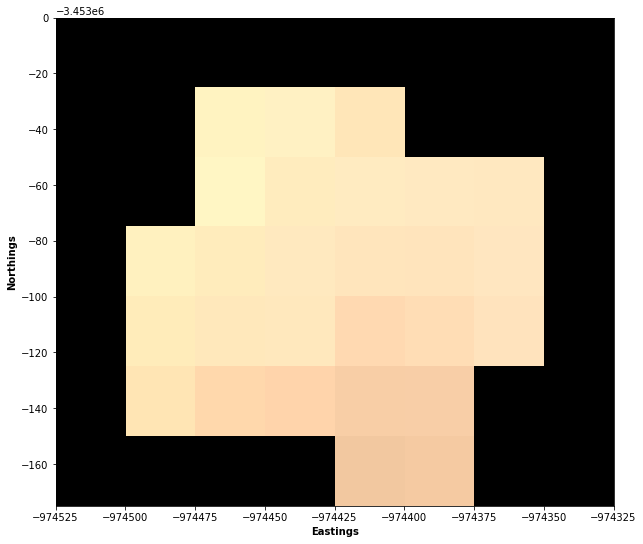

In [37]:
FIG_FieldRGB.FIG_field_RGB(field_array_ls8, output, field_data, fignum)
fignum += 1

### Create a statistics dataframe, comparing satellite and field data

In [38]:
fls8_df, fs2a_df, fs2b_df = CreateManyStats.create_manystats(ls8_array, s2a_array, s2b_array, ls8_bad_days, s2a_bad_days, s2b_bad_days, ground_brdf_ls8, ground_brdf_s2a, field_data)

# Figure

### Plot comparison spectra of satellite and field data, on a pixel-by-pixel basis

Error bars are shown for the satellite and field data, based on the standard deviation of the pixels
within the field. The black line shows the satellite data, which has been averaged over all pixels that satisfy the Datacube query ie. all pixels shown in Figure 11. The orange line shows satellite data which has been averaged over only those pixels that overlap with at least one field measurement.

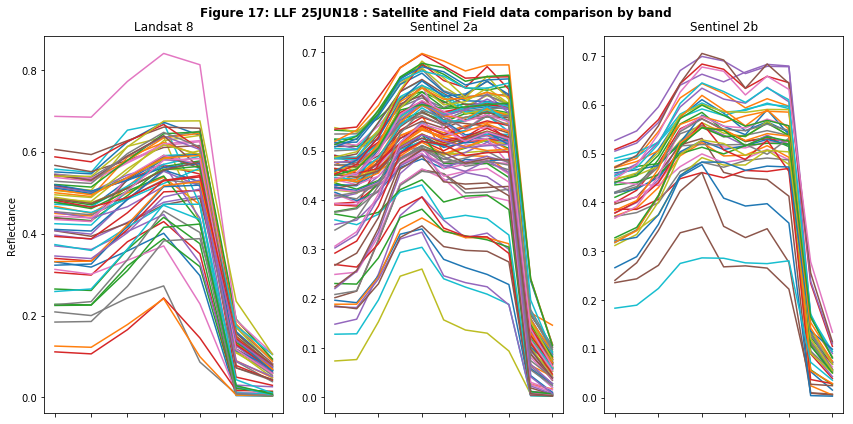

In [39]:
FIG_ManySatFieldBands.FIG_many_sat_field_bands(ls8_array, s2a_array, s2b_array, fls8_df, fs2a_df, fs2b_df, output, field_data, fignum)
fignum += 1

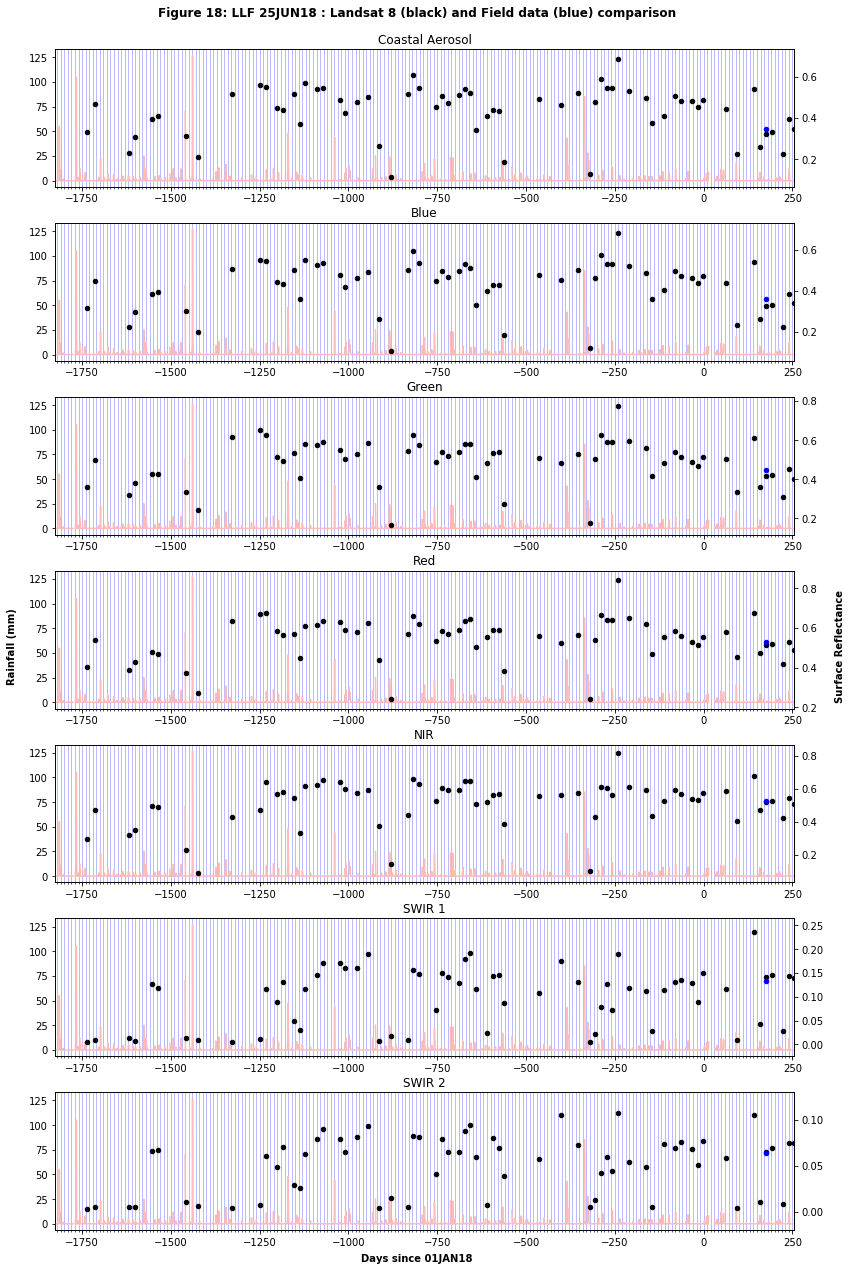

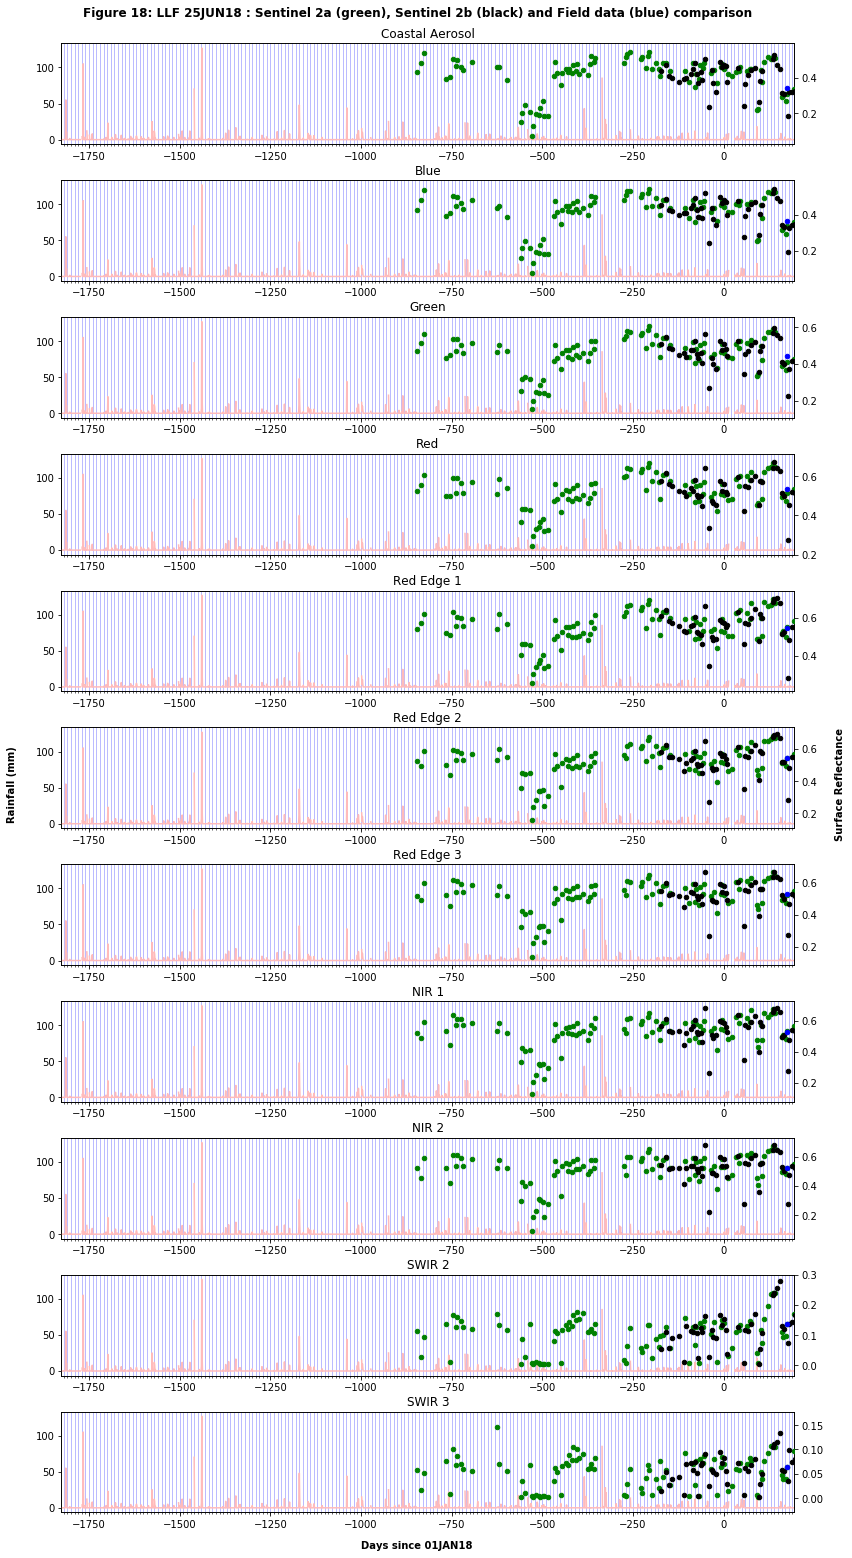

In [40]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [41]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 65
Landsat 8 Surface Reflectance for Band 1 is 0.451+/-0.124 (27.43%)
Landsat 8 Surface Reflectance for Band 2 is 0.443+/-0.121 (27.38%)
Landsat 8 Surface Reflectance for Band 3 is 0.504+/-0.119 (23.59%)
Landsat 8 Surface Reflectance for Band 4 is 0.56+/-0.107 (19.06%)
Landsat 8 Surface Reflectance for Band 5 is 0.529+/-0.133 (25.13%)
Landsat 8 Surface Reflectance for Band 6 is 0.1+/-0.071 (71.36%)
Landsat 8 Surface Reflectance for Band 7 is 0.051+/-0.037 (72.77%)

SENTINEL 2a: Number of adjacent overpasses: 98
Sentinel 2a Surface Reflectance for Band 1 is 0.408+/-0.056 (13.81%)
Sentinel 2a Surface Reflectance for Band 2 is 0.409+/-0.057 (13.98%)
Sentinel 2a Surface Reflectance for Band 3 is 0.45+/-0.059 (13.2%)
Sentinel 2a Surface Reflectance for Band 4 is 0.515+/-0.063 (12.27%)
Sentinel 2a Surface Reflectance for Band 5 is 0.54+/-0.068 (12.55%)
Sentinel 2a Surface Reflectance for Band 6 is 0.511+/-0.08 (15.69%)
Sentinel 2a Surface Reflectance

In [42]:
MultiTimeLineDry.multi_time_line_dry(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)

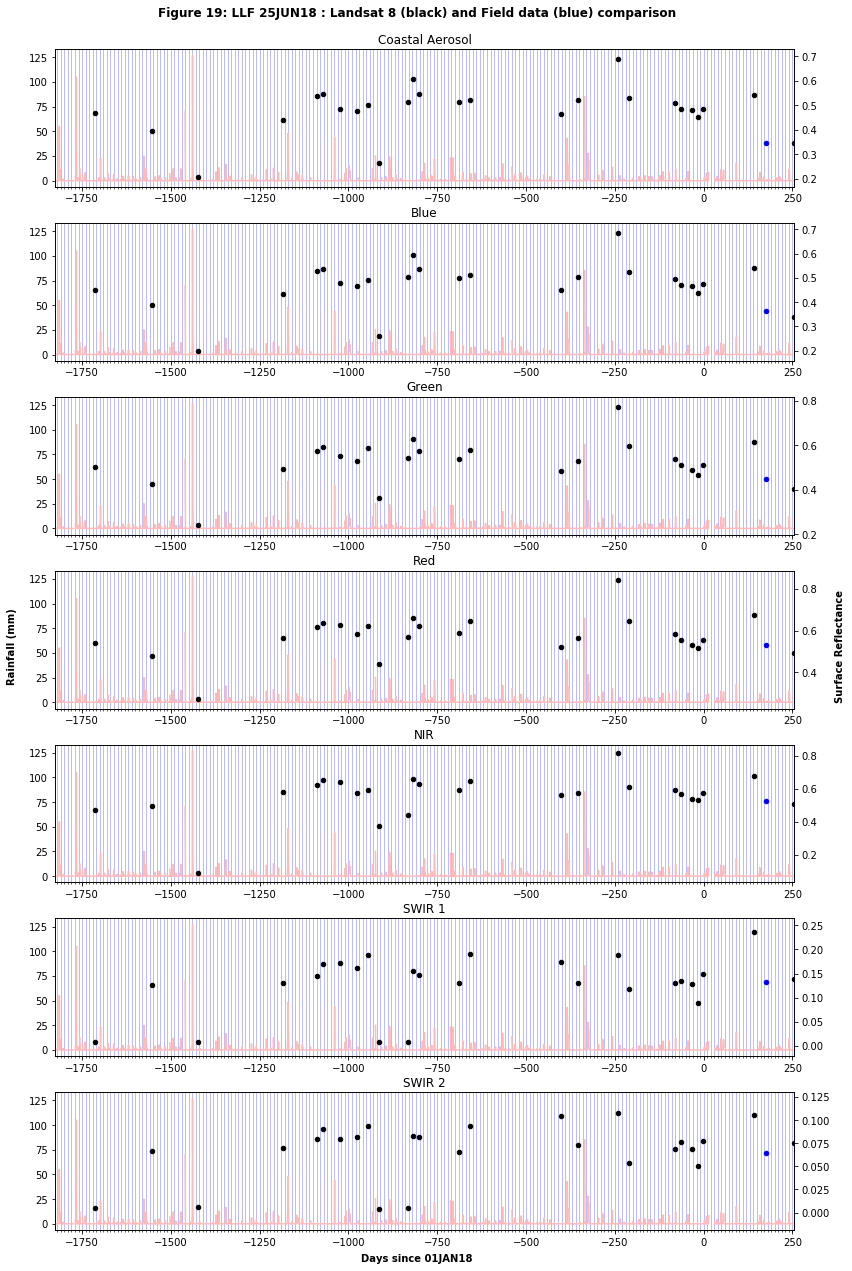

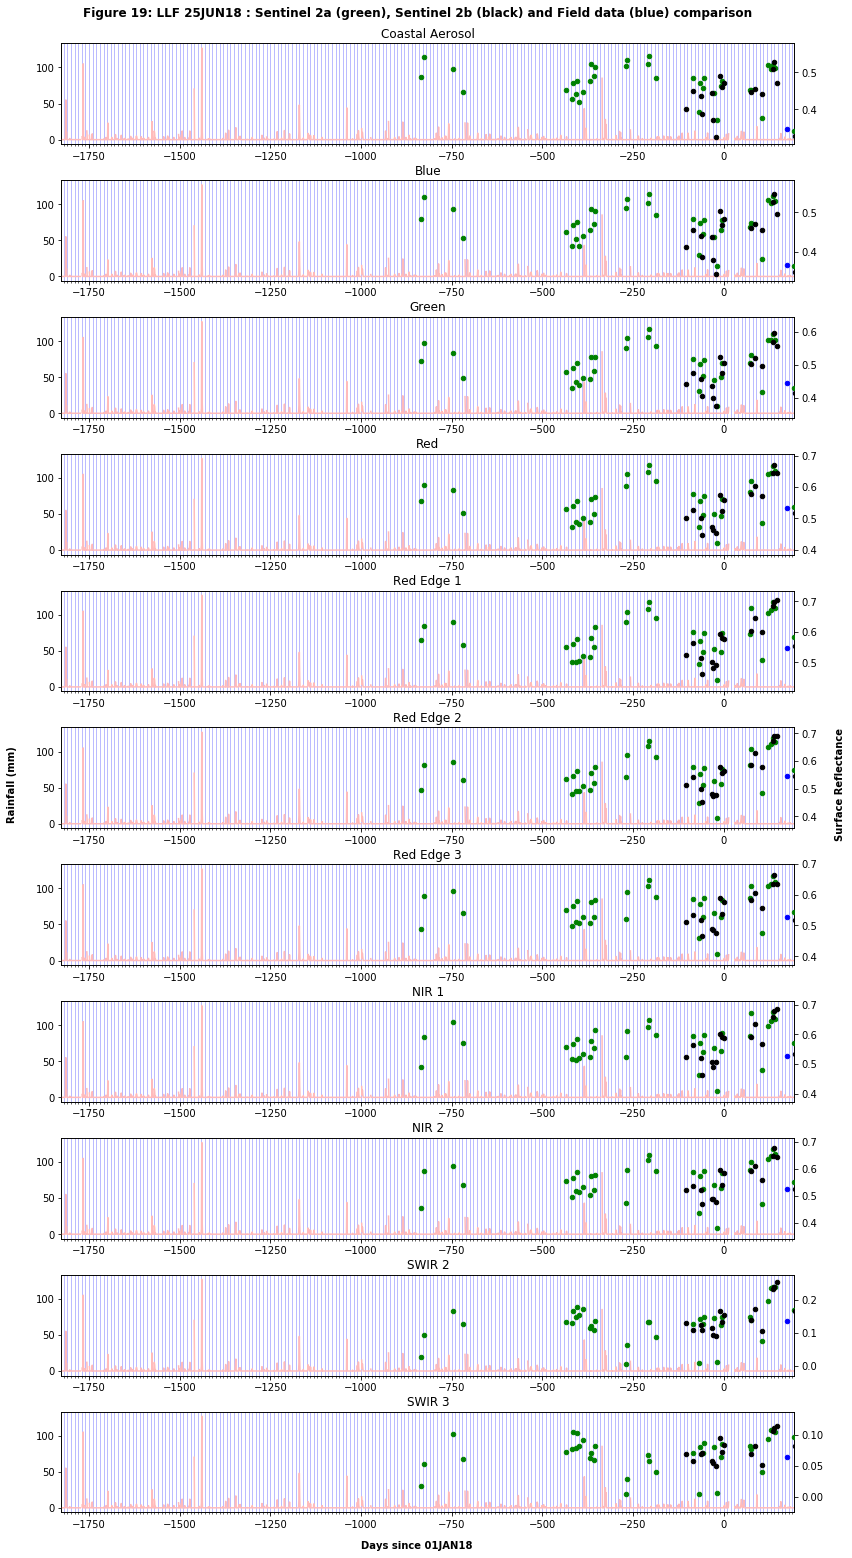

In [43]:
FIG_MultiTimeLine.FIG_multi_time_line(fls8_df, fs2a_df, fs2b_df, ls8_csvs, sent_csvs, rain_dat, field_data, output, fignum)
fignum+=1

In [44]:
dd0_ls8, dd1_ls8, dd0_s2a, dd1_s2a, dd0_s2b, dd1_s2b = CalcStats.calc_stats(fls8_df, fs2a_df, fs2b_df)

LANDSAT 8: Number of adjacent overpasses: 26
Landsat 8 Surface Reflectance for Band 1 is 0.517+/-0.054 (10.5%)
Landsat 8 Surface Reflectance for Band 2 is 0.504+/-0.054 (10.65%)
Landsat 8 Surface Reflectance for Band 3 is 0.539+/-0.051 (9.43%)
Landsat 8 Surface Reflectance for Band 4 is 0.579+/-0.049 (8.53%)
Landsat 8 Surface Reflectance for Band 5 is 0.564+/-0.094 (16.69%)
Landsat 8 Surface Reflectance for Band 6 is 0.11+/-0.066 (60.19%)
Landsat 8 Surface Reflectance for Band 7 is 0.059+/-0.033 (55.59%)

SENTINEL 2a: Number of adjacent overpasses: 37
Sentinel 2a Surface Reflectance for Band 1 is 0.469+/-0.041 (8.73%)
Sentinel 2a Surface Reflectance for Band 2 is 0.466+/-0.044 (9.41%)
Sentinel 2a Surface Reflectance for Band 3 is 0.493+/-0.049 (9.85%)
Sentinel 2a Surface Reflectance for Band 4 is 0.544+/-0.054 (9.91%)
Sentinel 2a Surface Reflectance for Band 5 is 0.567+/-0.056 (9.87%)
Sentinel 2a Surface Reflectance for Band 6 is 0.542+/-0.064 (11.77%)
Sentinel 2a Surface Reflectance f

## How long did this notebook take to run?

In [45]:
import datetime
print("This Notebook took ", str(datetime.timedelta(seconds=int((time.time() - start_time)))), "(h:m:s) to run")

This Notebook took  0:31:10 (h:m:s) to run
